In [2]:
import pandas as pd
import numpy as np

In [3]:
# suffix = '2019_Feb_28'
# df = pd.read_csv('data/kaiterra_fieldeggid_15min_{}_panel.csv'.format(suffix), index_col=[0,1], parse_dates=True)
df = pd.read_csv('data/govdata/govdata_15min_panel.csv', index_col=[0,1], parse_dates=True)
df.sort_index(inplace=True)

In [4]:
# insert a column for day
dt_index = df.index.get_level_values(1)
df['date'] = dt_index.strftime('%Y-%m-%d')
df

pm25   pm10        date
monitor_id      timestamp_round                              
AnandVihar_DPCC 2018-03-01 00:00:00  195.0  707.0  2018-03-01
                2018-03-01 00:15:00  195.0  707.0  2018-03-01
                2018-03-01 00:30:00  181.0  606.0  2018-03-01
                2018-03-01 00:45:00  181.0  606.0  2018-03-01
                2018-03-01 01:00:00  181.0  606.0  2018-03-01
                2018-03-01 01:15:00  181.0  606.0  2018-03-01
                2018-03-01 01:30:00  174.0  550.0  2018-03-01
                2018-03-01 01:45:00  174.0  550.0  2018-03-01
                2018-03-01 02:00:00  174.0  550.0  2018-03-01
                2018-03-01 02:15:00  174.0  550.0  2018-03-01
                2018-03-01 02:30:00  188.0  442.0  2018-03-01
                2018-03-01 02:45:00  188.0  442.0  2018-03-01
                2018-03-01 03:00:00  188.0  442.0  2018-03-01
                2018-03-01 03:15:00  188.0  442.0  2018-03-01
                2018-03-01 03:30:00  209.0  661.0  2018-03-01
                2018-03-01 03:45:00  209.0  661.0  2018-03-01
                2018-03-01 04:00:00  209.0  661.0  2018-03-01
                2018-03-01 04:15:00  209.0  661.0  2018-03-01
                2018-03-01 04:30:00  183.0  399.0  2018-03-01
                2018-03-01 04:45:00  183.0  399.0  2018-03-01
                2018-03-01 05:00:00  183.0  399.0  2018-03-01
                2018-03-01 05:15:00  183.0  399.0  2018-03-01
                2018-03-01 05:30:00  129.0  291.0  2018-03-01
                2018-03-01 05:45:00  129.0  291.0  2018-03-01
                2018-03-01 06:00:00  129.0  291.0  2018-03-01
                2018-03-01 06:15:00  129.0  291.0  2018-03-01
                2018-03-01 06:30:00  138.0  379.0  2018-03-01
                2018-03-01 06:45:00  138.0  379.0  2018-03-01
                2018-03-01 07:00:00  138.0  379.0  2018-03-01
                2018-03-01 07:15:00  138.0  379.0  2018-03-01
...                                    ...    ...         ...
Wazirpur_DPCC   2019-02-28 16:30:00  313.0  153.0  2019-02-28
                2019-02-28 16:45:00  313.0  153.0  2019-02-28
                2019-02-28 17:00:00  328.0  168.0  2019-02-28
                2019-02-28 17:15:00  328.0  168.0  2019-02-28
                2019-02-28 17:30:00  328.0  168.0  2019-02-28
                2019-02-28 17:45:00  328.0  168.0  2019-02-28
                2019-02-28 18:00:00  345.0  167.0  2019-02-28
                2019-02-28 18:15:00  345.0  167.0  2019-02-28
                2019-02-28 18:30:00  345.0  167.0  2019-02-28
                2019-02-28 18:45:00  345.0  167.0  2019-02-28
                2019-02-28 19:00:00  294.0  158.0  2019-02-28
                2019-02-28 19:15:00  294.0  158.0  2019-02-28
                2019-02-28 19:30:00  294.0  158.0  2019-02-28
                2019-02-28 19:45:00  294.0  158.0  2019-02-28
                2019-02-28 20:00:00  250.0  133.0  2019-02-28
                2019-02-28 20:15:00  250.0  133.0  2019-02-28
                2019-02-28 20:30:00  250.0  133.0  2019-02-28
                2019-02-28 20:45:00  250.0  133.0  2019-02-28
                2019-02-28 21:00:00  204.0  130.0  2019-02-28
                2019-02-28 21:15:00  204.0  130.0  2019-02-28
                2019-02-28 21:30:00  204.0  130.0  2019-02-28
                2019-02-28 21:45:00  204.0  130.0  2019-02-28
                2019-02-28 22:00:00  190.0  117.0  2019-02-28
                2019-02-28 22:15:00  190.0  117.0  2019-02-28
                2019-02-28 22:30:00  190.0  117.0  2019-02-28
                2019-02-28 22:45:00  190.0  117.0  2019-02-28
                2019-02-28 23:00:00  169.0  112.0  2019-02-28
                2019-02-28 23:15:00  169.0  112.0  2019-02-28
                2019-02-28 23:30:00  169.0  112.0  2019-02-28
                2019-02-28 23:45:00  169.0  112.0  2019-02-28

[1156320 rows x 3 columns]

In [5]:
grouped = df.groupby('date')

testdays = []

for dayno, (date, group) in enumerate(grouped, 1):
    if dayno % 5 == 0:
        validcounts_day = group.groupby(level=0).pm25.count()
        validcounts_day.sort_values(ascending=False, inplace=True)
        validcounts_day_pos = validcounts_day[validcounts_day > 0]
        
        testdays.append((date, validcounts_day.sum(), validcounts_day_pos.size, validcounts_day_pos.index.values, validcounts_day_pos.values))

In [6]:
print(len(testdays))
testdays

73


[('2018-03-05',
  2588,
  29,
  array(['Wazirpur_DPCC', 'NehruNagar_DPCC', 'AyaNagar_IMD',
         'BurariCrossing_IMD', 'CRRIMathuraRoad_IMD', 'DTU_CPCB',
         'IGIAirport_IMD', 'ITO_CPCB', 'JNS_DPCC', 'Jahangirpuri_DPCC',
         'LodhiRoad_IMD', 'MDCNS_DPCC', 'NSIT_CPCB', 'MandirMarg_DPCC',
         'OkhlaPhase2_DPCC', 'PunjabiBagh_DPCC', 'SoniaVihar_DPCC',
         'Pusa_IMD', 'AnandVihar_DPCC', 'Patparganj_DPCC',
         'VivekVihar_DPCC', 'RKPuram_DPCC', 'Rohini_DPCC', 'IHBAS_CPCB',
         'Shadipur_CPCB', 'Sirifort_CPCB', 'AshokVihar_DPCC',
         'DwarkaSector8_DPCC', 'DKSSR_DPCC'], dtype=object),
  array([96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96,
         96, 96, 96, 93, 92, 92, 80, 76, 72, 72, 58, 33])),
 ('2018-03-10',
  2621,
  29,
  array(['Wazirpur_DPCC', 'NehruNagar_DPCC', 'AshokVihar_DPCC',
         'AyaNagar_IMD', 'CRRIMathuraRoad_IMD', 'DwarkaSector8_DPCC',
         'IGIAirport_IMD', 'ITO_CPCB', 'JNS_DPCC', 'Jahangirpuri_DPCC',
   

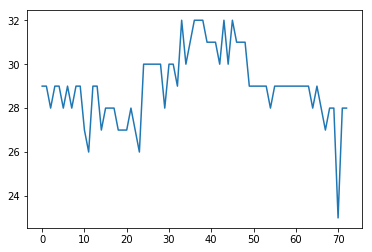

In [8]:
from operator import itemgetter
import matplotlib.pyplot as plt

counts_test = map(itemgetter(2), testdays)
plt.plot(list(counts_test))
plt.show()

In [32]:
seed = 6
np.random.seed(seed)

testdays_select = []
totalcount = 0
for tup in testdays:
    num, ids, counts = tup[2:]
    num_select = int(num / 2)
    num_nonselect = num - num_select
    if num_select == 0:
        testdays_select.append((tup[0], 0, [], [], num_nonselect, ids, counts))
    else:
        indices = np.arange(len(ids))
        indices_select = np.random.choice(indices, num_select, replace=False)
        indices_nonselect = np.setdiff1d(indices, indices_select)
        totalcount += counts[indices_select].sum()
        testdays_select.append((tup[0], num_select, ids[indices_select], counts[indices_select], 
                               num_nonselect, ids[indices_nonselect], counts[indices_nonselect]))

print(totalcount)
testdays_select

94616


[('2018-03-05',
  14,
  array(['Wazirpur_DPCC', 'DwarkaSector8_DPCC', 'AshokVihar_DPCC',
         'IGIAirport_IMD', 'OkhlaPhase2_DPCC', 'AnandVihar_DPCC',
         'ITO_CPCB', 'DTU_CPCB', 'RKPuram_DPCC', 'Pusa_IMD', 'AyaNagar_IMD',
         'JNS_DPCC', 'Sirifort_CPCB', 'CRRIMathuraRoad_IMD'], dtype=object),
  array([96, 58, 72, 96, 96, 96, 96, 96, 92, 96, 96, 96, 72, 96]),
  15,
  array(['NehruNagar_DPCC', 'BurariCrossing_IMD', 'Jahangirpuri_DPCC',
         'LodhiRoad_IMD', 'MDCNS_DPCC', 'NSIT_CPCB', 'MandirMarg_DPCC',
         'PunjabiBagh_DPCC', 'SoniaVihar_DPCC', 'Patparganj_DPCC',
         'VivekVihar_DPCC', 'Rohini_DPCC', 'IHBAS_CPCB', 'Shadipur_CPCB',
         'DKSSR_DPCC'], dtype=object),
  array([96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 93, 92, 80, 76, 33])),
 ('2018-03-10',
  14,
  array(['Shadipur_CPCB', 'ITO_CPCB', 'Wazirpur_DPCC', 'Jahangirpuri_DPCC',
         'Sirifort_CPCB', 'IHBAS_CPCB', 'LodhiRoad_IMD', 'MDCNS_DPCC',
         'NehruNagar_DPCC', 'SoniaVihar_DPCC', 'AyaNag

In [33]:
df_testdays = pd.DataFrame(index=pd.Index(list(map(itemgetter(0), testdays)), name='date'), columns=df.index.levels[0])
df_testdays

monitor_id,AnandVihar_DPCC,AshokVihar_DPCC,AyaNagar_IMD,BurariCrossing_IMD,CRRIMathuraRoad_IMD,DKSSR_DPCC,DTU_CPCB,DwarkaSector8_DPCC,EastArjunNagar_CPCB,IGIAirport_IMD,...,Pusa_DPCC,Pusa_IMD,RKPuram_DPCC,Rohini_DPCC,Shadipur_CPCB,Sirifort_CPCB,SoniaVihar_DPCC,SriAurobindoMarg_DPCC,VivekVihar_DPCC,Wazirpur_DPCC
date,,,,,,,,,,,,,,,,,,,,,
2018-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
for tup in testdays_select:
    df_testdays.loc[tup[0], tup[2]] = 1
    df_testdays.loc[tup[0], tup[5]] = 0
df_testdays

monitor_id,AnandVihar_DPCC,AshokVihar_DPCC,AyaNagar_IMD,BurariCrossing_IMD,CRRIMathuraRoad_IMD,DKSSR_DPCC,DTU_CPCB,DwarkaSector8_DPCC,EastArjunNagar_CPCB,IGIAirport_IMD,...,Pusa_DPCC,Pusa_IMD,RKPuram_DPCC,Rohini_DPCC,Shadipur_CPCB,Sirifort_CPCB,SoniaVihar_DPCC,SriAurobindoMarg_DPCC,VivekVihar_DPCC,Wazirpur_DPCC
date,,,,,,,,,,,,,,,,,,,,,
2018-03-05,1,1,1,0,1,0,1,1,NaN,1,...,NaN,1,1,0,0,1,0,NaN,0,1
2018-03-10,0,0,1,0,0,0,0,0,NaN,0,...,NaN,0,0,1,1,1,1,NaN,1,1
2018-03-15,1,1,0,0,0,NaN,1,0,NaN,1,...,NaN,0,1,1,1,1,1,NaN,0,1
2018-03-20,1,1,0,0,1,0,1,1,NaN,1,...,NaN,1,1,0,0,0,0,NaN,0,1
2018-03-25,0,1,1,1,1,0,0,1,NaN,0,...,NaN,0,0,1,0,1,0,NaN,1,1
2018-03-30,0,0,0,0,1,1,1,1,NaN,NaN,...,NaN,1,0,1,1,0,0,NaN,1,1
2018-04-04,0,0,1,1,0,1,1,1,NaN,0,...,NaN,1,0,1,0,1,1,NaN,0,1
2018-04-09,0,0,1,1,0,1,1,0,NaN,0,...,NaN,0,0,0,1,NaN,1,NaN,0,1
2018-04-14,0,0,0,0,0,1,1,1,NaN,1,...,NaN,1,0,1,0,0,1,NaN,1,1


In [35]:
df_testdays.sum(axis=1)

date
2018-03-05    14.0
2018-03-10    14.0
2018-03-15    14.0
2018-03-20    14.0
2018-03-25    14.0
2018-03-30    14.0
2018-04-04    14.0
2018-04-09    14.0
2018-04-14    14.0
2018-04-19    14.0
2018-04-24    13.0
2018-04-29    13.0
2018-05-04    14.0
2018-05-09    14.0
2018-05-14    13.0
2018-05-19    14.0
2018-05-24    14.0
2018-05-29    14.0
2018-06-03    13.0
2018-06-08    13.0
2018-06-13    13.0
2018-06-18    14.0
2018-06-23    13.0
2018-06-28    13.0
2018-07-03    15.0
2018-07-08    15.0
2018-07-13    15.0
2018-07-18    15.0
2018-07-23    15.0
2018-07-28    14.0
              ... 
2018-10-06    16.0
2018-10-11    15.0
2018-10-16    16.0
2018-10-21    15.0
2018-10-26    15.0
2018-10-31    15.0
2018-11-05    14.0
2018-11-10    14.0
2018-11-15    14.0
2018-11-20    14.0
2018-11-25    14.0
2018-11-30    14.0
2018-12-05    14.0
2018-12-10    14.0
2018-12-15    14.0
2018-12-20    14.0
2018-12-25    14.0
2018-12-30    14.0
2019-01-04    14.0
2019-01-09    14.0
2019-01-14    14.0
2019-01

In [36]:
# df_testdays.to_csv('data/testdays_kaiterra_15min_2019_Feb_28_seed{}.csv'.format(seed))
df_testdays.to_csv('data/testdays_govdata_set1_seed{}.csv'.format(seed))